In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import squarify
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import networkx as nx
from itertools import combinations

In [2]:
#pip install geopandas matplotlib

In [90]:
netflix = pd.read_csv("netflix_titles.csv")
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [91]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [92]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [93]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [94]:
netflix['year_added'] = netflix["date_added"].dt.year

In [95]:
years_count = pd.crosstab(netflix["year_added"], columns='count')
years_count

col_0,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,24
2015.0,82
2016.0,429


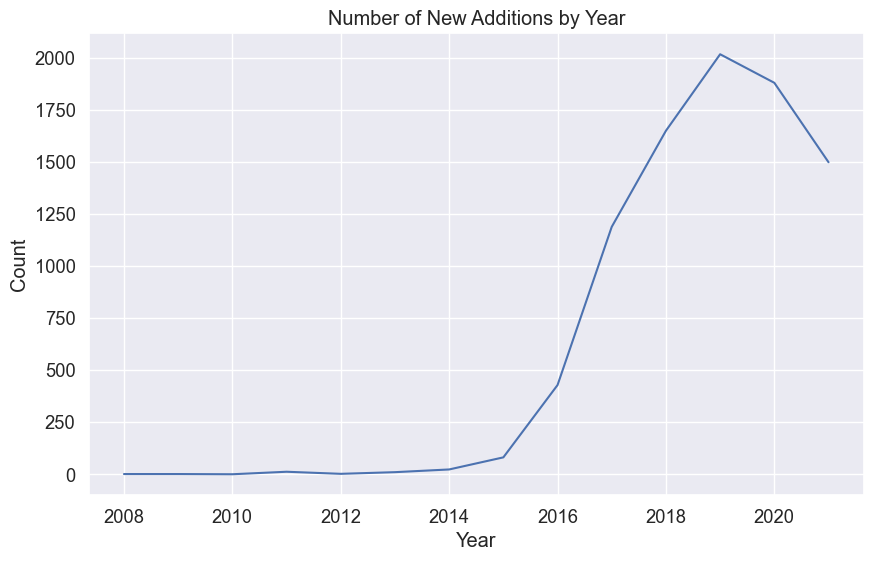

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sorted(netflix[netflix['year_added'].notna()]['year_added'].unique()), years_count['count'])
ax.set_title("Number of New Additions by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

In [97]:
len(netflix["country"].unique())

749

In [98]:
netflix["country"].head(10)

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [99]:
netflix['country_list'] = netflix['country'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

In [100]:
netflix["country_list"].head(10)

0                                      [United States]
1                                       [South Africa]
2                                                   []
3                                                   []
4                                              [India]
5                                                   []
6                                                   []
7    [United States, Ghana, Burkina Faso, United Ki...
8                                     [United Kingdom]
9                                      [United States]
Name: country_list, dtype: object

In [101]:
np.mean([len(s) for s in netflix["country_list"]])

1.1370500738049278

In [102]:
all_countries = []
for i in range(0, len(netflix['country_list'])):
    all_countries += netflix['country_list'][i]
all_countries = pd.Series(all_countries)

In [103]:
countries_count = all_countries.value_counts().reset_index()
countries_count.columns = ['Country', 'Count']

In [104]:
countries_count

,Country,Count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Bermuda,1
123,Ecuador,1
124,Armenia,1
125,Mongolia,1


In [105]:
top_10_countries = countries_count.head(10)

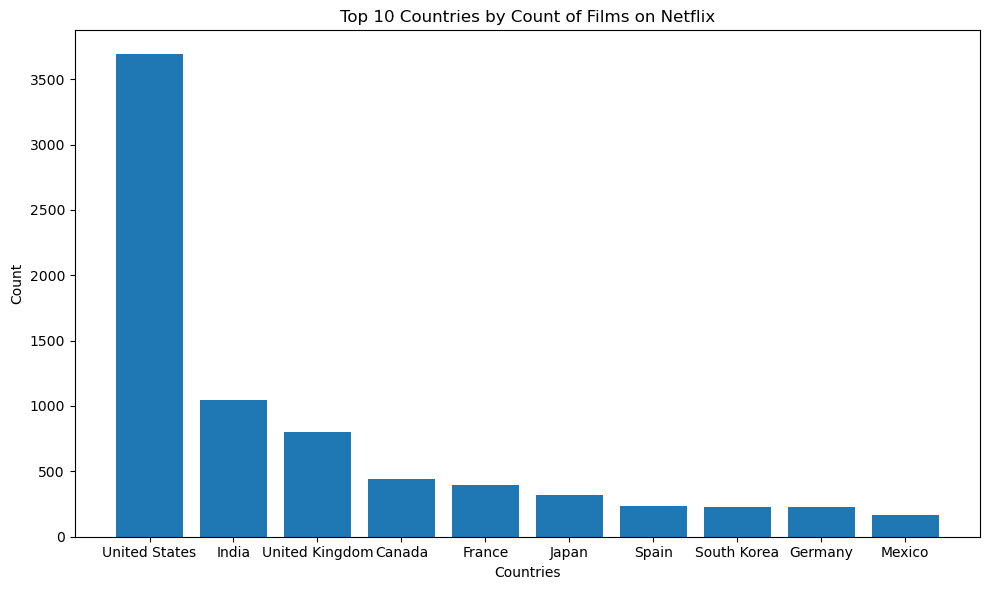

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_countries['Country'], top_10_countries['Count'])
ax.set_title("Top 10 Countries by Count of Films on Netflix")
ax.set_ylabel("Count")
ax.set_xlabel("Countries")
plt.tight_layout()
plt.show()

In [20]:
type_count = pd.crosstab(netflix['type'], columns = 'count')
type_count['percent'] = type_count['count']/len(netflix)

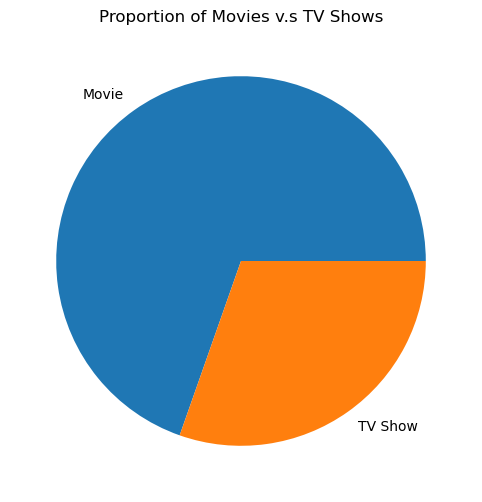

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(type_count['percent'], labels=netflix['type'].unique())
ax.set_title("Proportion of Movies v.s TV Shows")
plt.show()

In [22]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  country_list  8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963.4+ KB


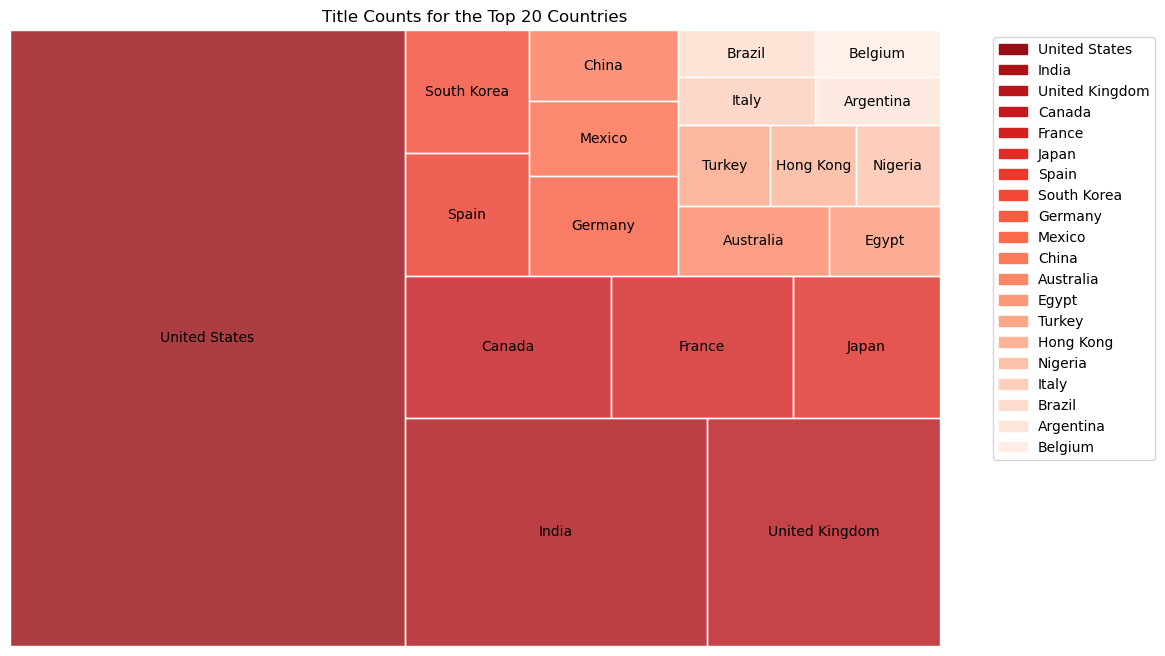

In [23]:
# Sort the DataFrame by 'Count' in descending order and select the top 30 countries
df_top30 = countries_count.sort_values(by='Count', ascending=False).head(20)

# Prepare the data for treemap
sizes = df_top30['Count']
labels = df_top30['Country']

# Define a custom dark red colormap
n = len(df_top30)
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0.9, 0.05, n))  # Adjust the range for darker shades

# Plotting the treemap using `ax`
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, ax=ax)

# Adding title
ax.set_title('Title Counts for the Top 20 Countries')

# Removing axes for a cleaner look
ax.axis('off')

# Adding white borders
for rect, color in zip(ax.patches, colors):
    x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
    # Add a white border with a small width
    ax.add_patch(Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=1))


# Creating legend
# Create a dummy plot to generate legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Adding legend to the plot
ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [113]:
# Load the world map shapefile
shapefile_path = "ne_110m_admin_0_countries//ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [114]:
world["ADMIN"] = np.where(world["ADMIN"] == "United States of America", "United States", world["ADMIN"])

In [115]:
# Merge the dataset with the world map
world = world.merge(countries_count, how='left', left_on='ADMIN', right_on='Country')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Country,Count
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,NaN
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,445.0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States,3689.0


KeyError: 'Count'

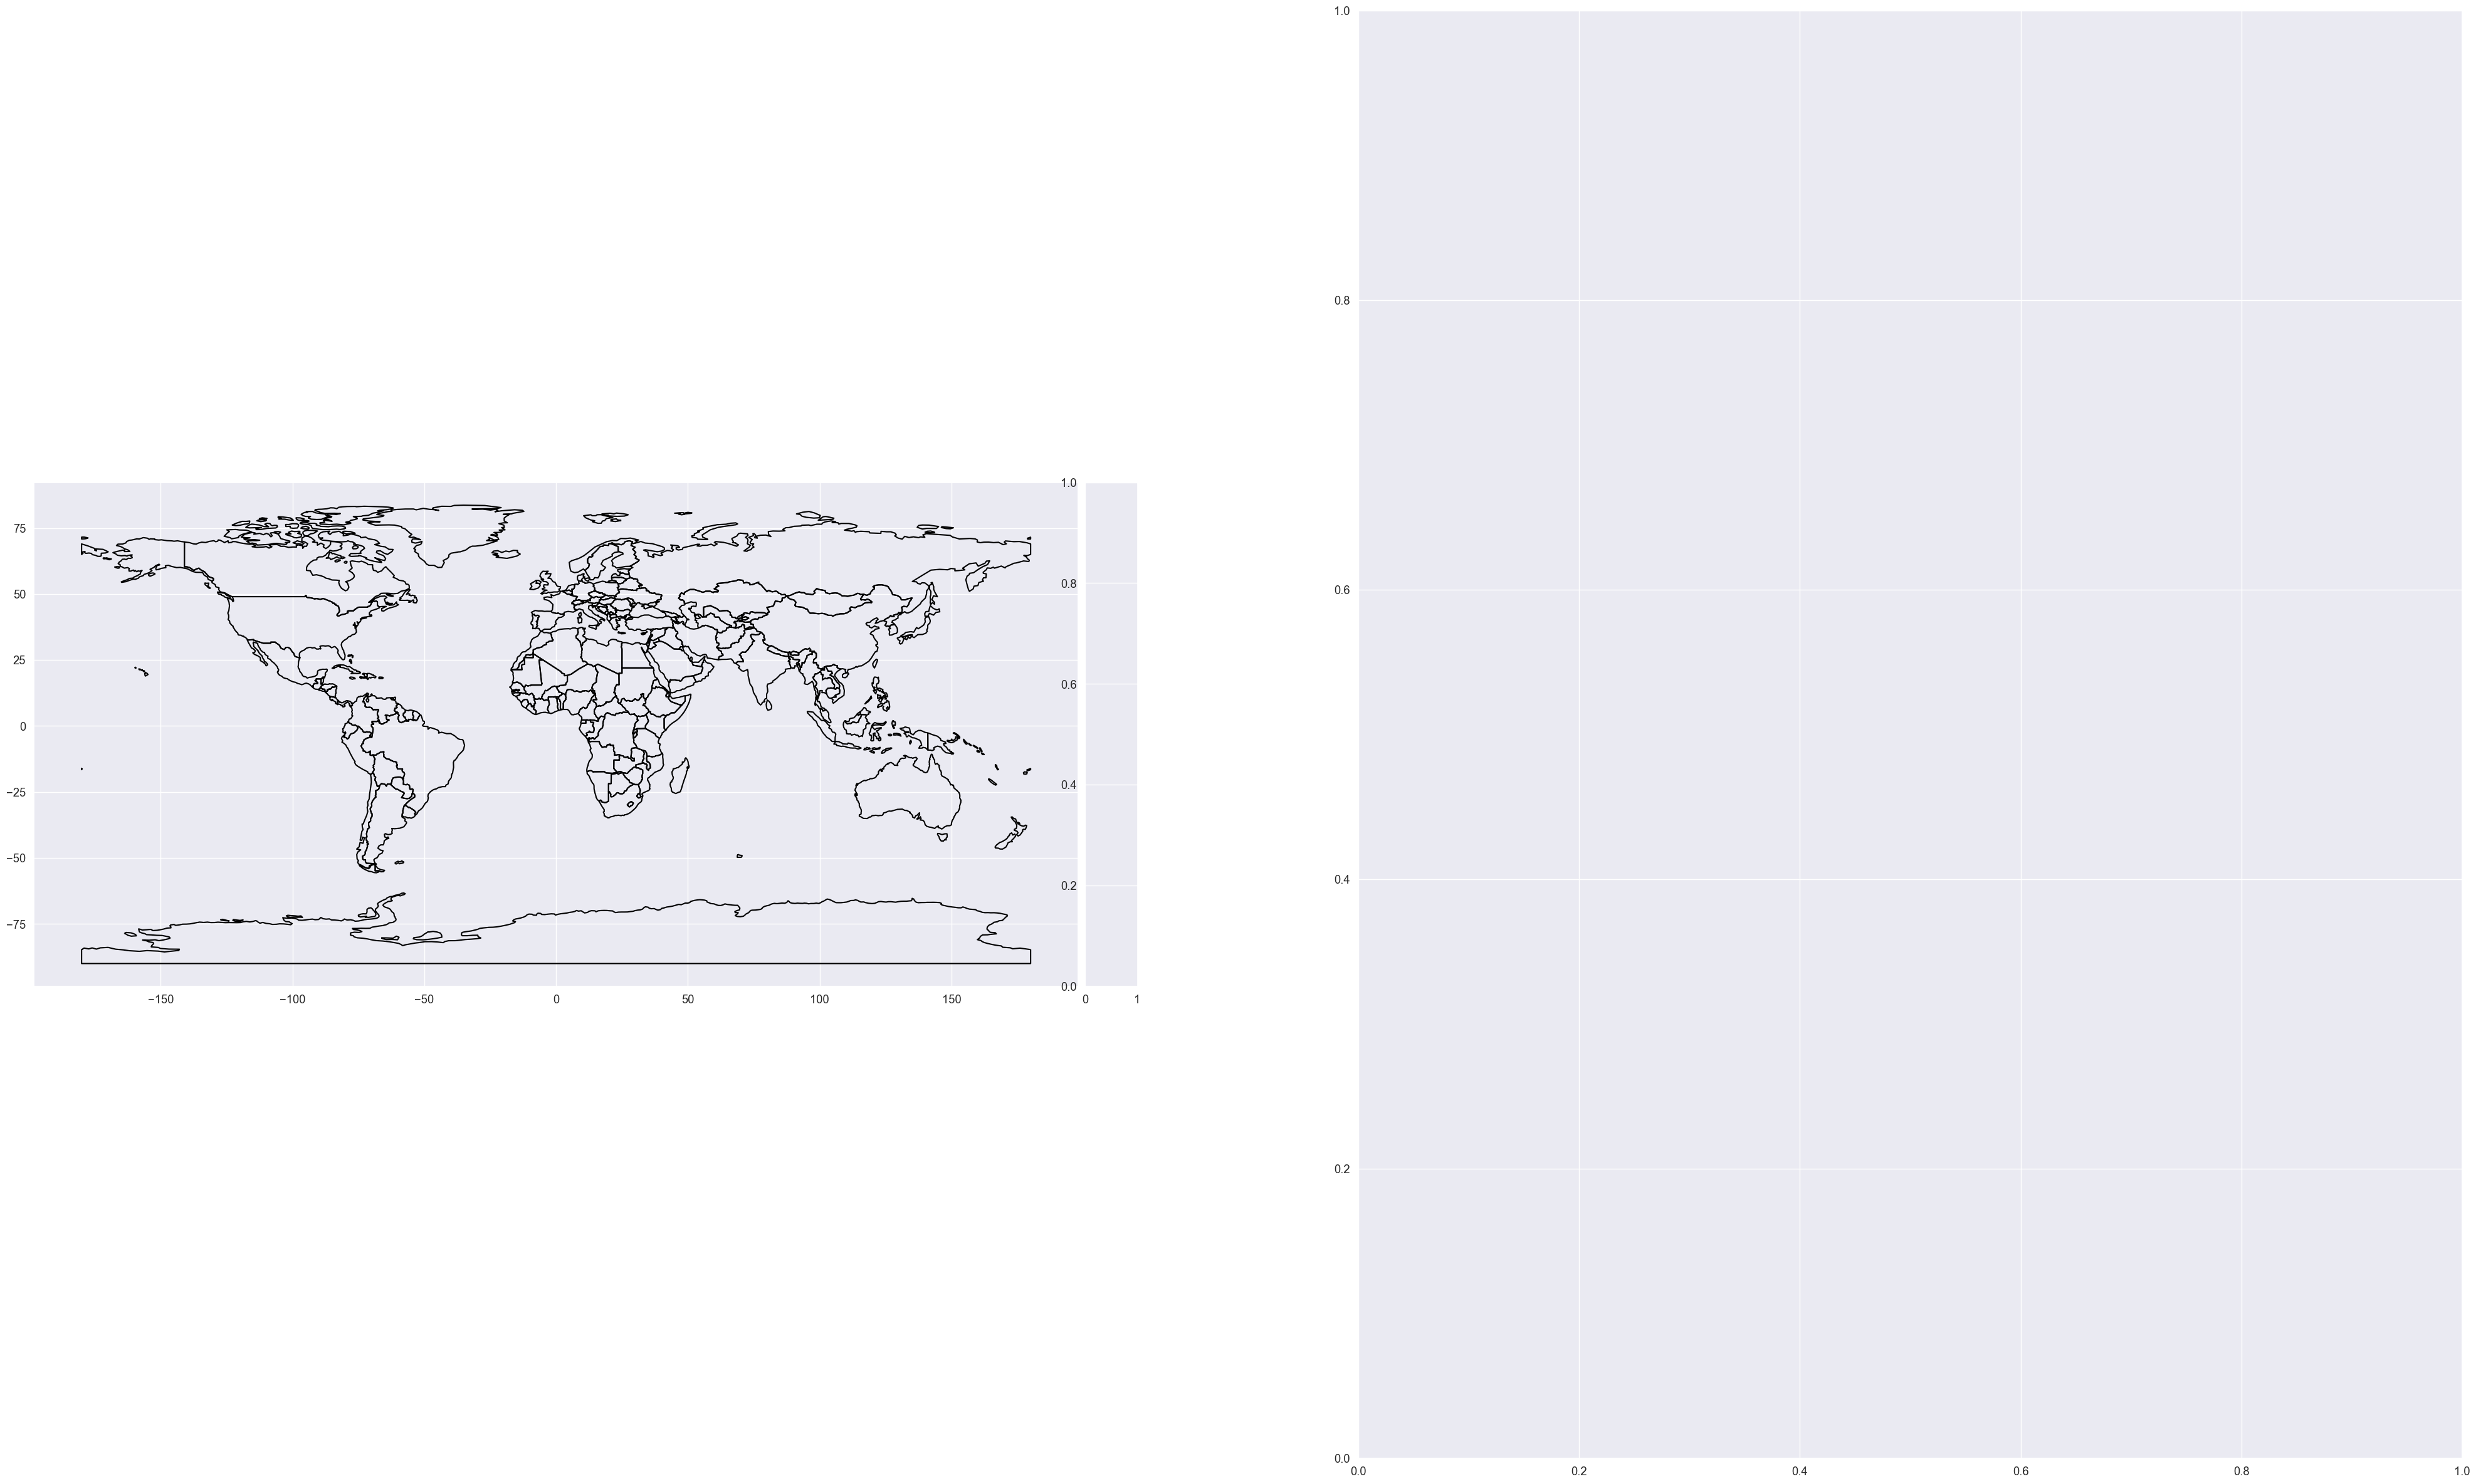

In [112]:
# Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(50, 30))

# Create a color map based on the count
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)

# cmap = plt.get_cmap('Reds')
# colors = cmap(np.linspace(0.9, 0, len(world)))

world.boundary.plot(ax=ax1, color = "black")
world.plot(column='Count', ax=ax1, legend=True, cax=cax, cmap = "Reds", missing_kwds={'color': 'lightgrey'})

# Add titles and labels
ax1.set_title('World Map Color Coded by Count of Netflix Titles', fontdict={'fontsize': 20}, pad=20)
ax1.set_axis_off()

# Add annotations with arrows for the largest 10 counts
top_10 = world.nlargest(10, 'Count')
top_10 = top_10[~(top_10["Country"] == "Japan")]
top_10 = top_10[~(top_10["Country"] == "United Kingdom")]
top_10 = top_10[~(top_10["Country"] == "France")]

for idx, row in top_10.iterrows():
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 20, row['geometry'].centroid.y - 10),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=10,
        ha='center'
    )

japan = world[world['Country'] == 'Japan']
if not japan.empty:
    row = japan.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 5, row['geometry'].centroid.y + 5),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=10,
        ha='center'
    )

UK = world[world['Country'] == 'United Kingdom']
if not UK.empty:
    row = UK.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 5, row['geometry'].centroid.y + 20),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=10,
        ha='center'
    )

France = world[world['Country'] == 'France']
if not France.empty:
    row = France.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 20, row['geometry'].centroid.y + 20),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=10,
        ha='center'
    )

# Show plot
#plt.show()

squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, ax=ax2)

# Adding title
ax2.set_title('Title Counts for the Top 20 Countries')

# Removing axes for a cleaner look
ax2.axis('off')

# Adding white borders
for rect, color in zip(ax2.patches, colors):
    x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
    # Add a white border with a small width
    ax2.add_patch(Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=1))


# Creating legend
# Create a dummy plot to generate legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Adding legend to the plot
ax2.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

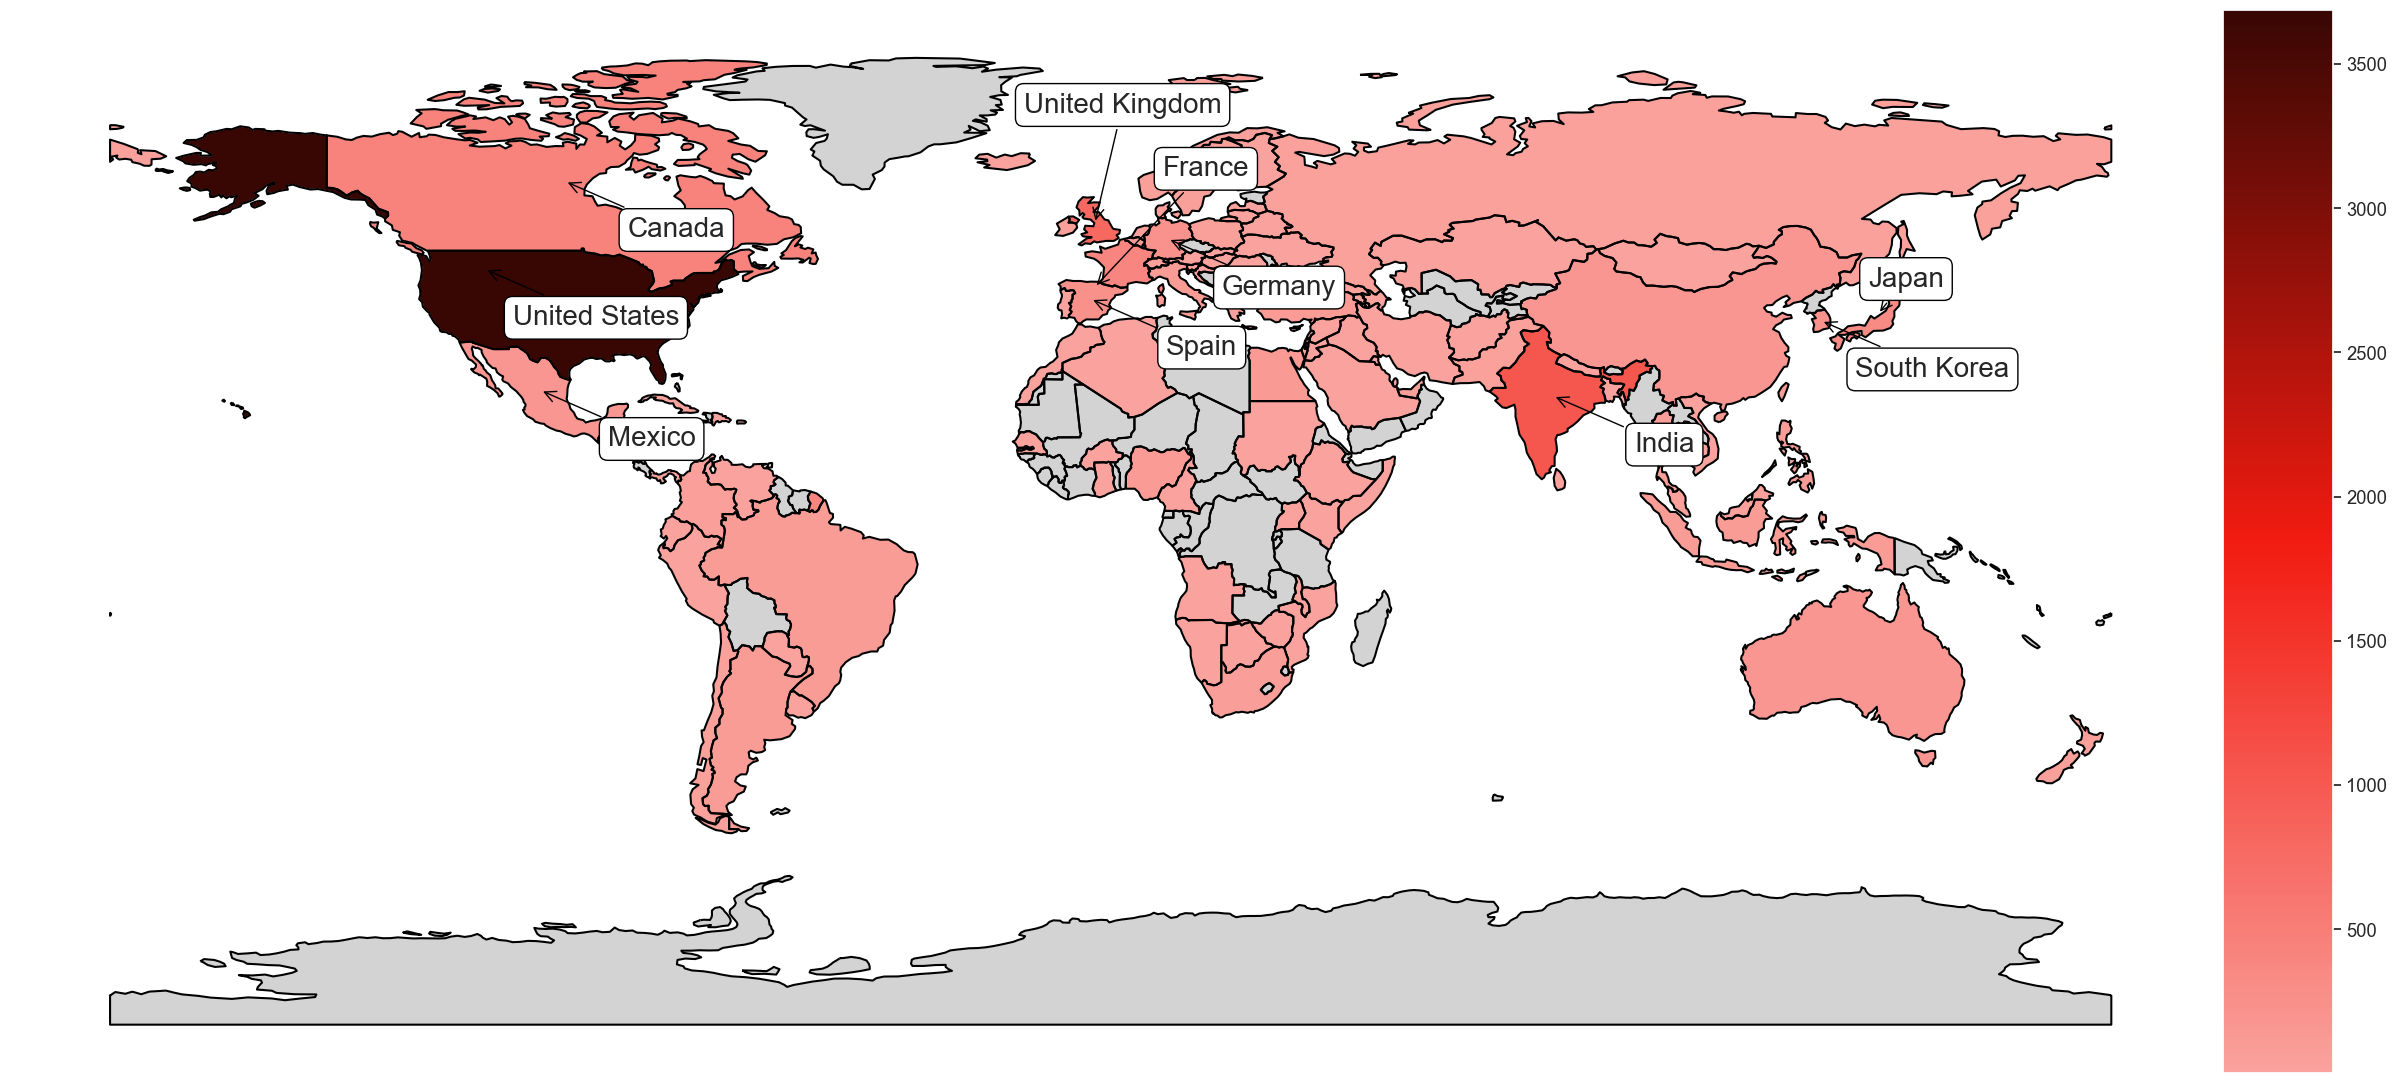

In [141]:
# Plotting
fig, ax1= plt.subplots(figsize=(30, 15))

# Create a color map based on the count
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)

# cmap = plt.get_cmap('Reds')
# colors = cmap(np.linspace(0.9, 0, len(world)))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#faa29d', '#f21b11', '#380703'])

world.boundary.plot(ax=ax1, color = "black")
world.plot(column='Count', ax=ax1, legend=True, cax=cax, cmap = cmap, missing_kwds={'color': 'lightgrey'})

# Add titles and labels
#ax1.set_title('World Map Color Coded by Count of Netflix Titles', fontdict={'fontsize':40}, pad=10,
#              fontweight='bold', loc="center")
ax1.set_axis_off()

# Add annotations with arrows for the largest 10 counts
top_10 = world.nlargest(10, 'Count')
top_10 = top_10[~(top_10["Country"] == "Japan")]
top_10 = top_10[~(top_10["Country"] == "United Kingdom")]
top_10 = top_10[~(top_10["Country"] == "France")]

for idx, row in top_10.iterrows():
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 20, row['geometry'].centroid.y - 10),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=20,
        ha='center'
    )

japan = world[world['Country'] == 'Japan']
if not japan.empty:
    row = japan.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 5, row['geometry'].centroid.y + 5),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=20,
        ha='center'
    )

UK = world[world['Country'] == 'United Kingdom']
if not UK.empty:
    row = UK.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 5, row['geometry'].centroid.y + 20),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=20,
        ha='center'
    )

France = world[world['Country'] == 'France']
if not France.empty:
    row = France.iloc[0]
    ax1.annotate(
        text=row['Country'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(row['geometry'].centroid.x + 20, row['geometry'].centroid.y + 20),  # Adjust the position of the text
        textcoords='data',
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=20,
        ha='center'
    )

# Show plot
#plt.show()

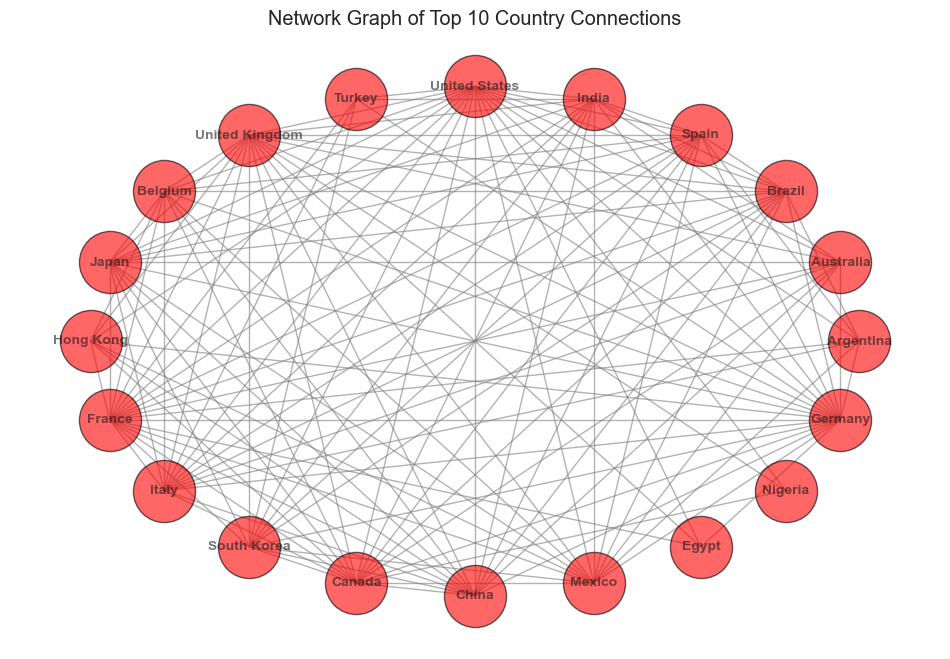

In [110]:
# Create DataFrame

df = pd.DataFrame(netflix["country"])

# Initialize empty graph
G = nx.Graph()

# Process each entry in the country column
for entry in df['country'].dropna():
    countries = [country.strip() for country in entry.split(',')]
    for country1, country2 in combinations(countries, 2):
        if not G.has_edge(country1, country2):
            G.add_edge(country1, country2)

top_10 = countries_count.nlargest(20, 'Count')
# Filter the graph to include only the top 10 countries
filtered_nodes = [node for node in G.nodes if node in list(top_10["Country"])]
H = G.subgraph(filtered_nodes).copy()

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the filtered network graph on the specified axis
pos = nx.circular_layout(H) # Layout for better visualization
nx.draw(H, pos, with_labels=True, node_color='red', node_size=2000, 
        edge_color='gray', font_size=10, font_weight='bold', 
        alpha=0.6, edgecolors='black', ax=ax)

# Set the title and display the plot
ax.set_title('Network Graph of Top 10 Country Connections')
plt.show()

In [92]:
len(netflix[netflix["type"]=="Movie"])

6131

In [98]:
imdb = pd.read_csv("imdb_data.csv")
len(imdb)

3740

In [95]:
imdb['Name'] = imdb['Name'].str.split('\n').str[0]
imdb.head()

,Rating,Name
0,8.8,Inception
1,8.7,The Matrix
2,9.0,The Lord of the Rings: The Return of the King
3,8.8,The Lord of the Rings: The Two Towers
4,8.5,The Departed


In [96]:
netflix = netflix.merge(imdb, how='left', left_on='title', right_on='Name')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,country_list,collab,Rating,Name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,[United States],1,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,[South Africa],1,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,[],0,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,[],0,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,[India],1,NaN,NaN


In [97]:
netflix["Rating"].isnull().sum()

6297

In [99]:
len(netflix) - len(imdb)

5153

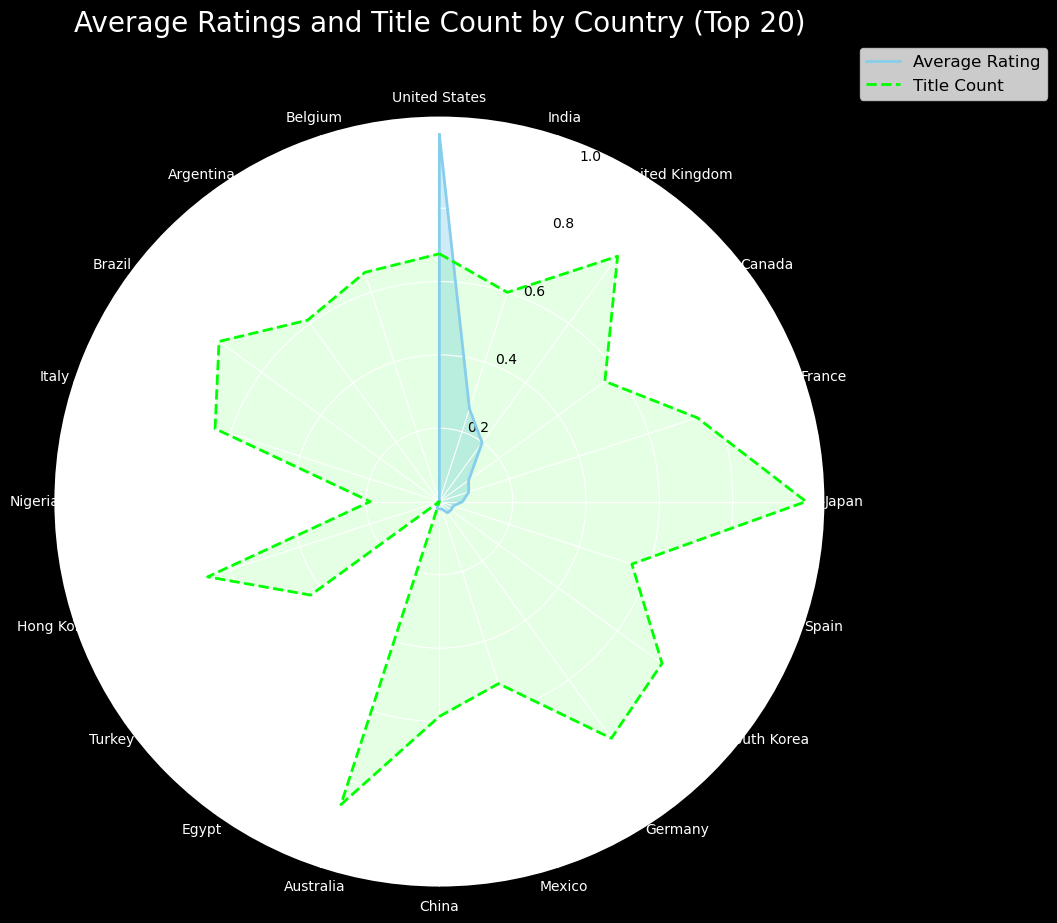

In [129]:
# Expand the countries into separate rows
df_expanded = netflix.drop('country', axis=1).join(
    netflix['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country')
)

# Calculate the average rating by country
country_avg_rating = df_expanded.groupby('country')['Rating'].mean()

# Calculate the title count by country
country_title_count = df_expanded.groupby('country')['title'].nunique()

# Filter to get the top 20 countries by average rating
top_20_countries = country_title_count.nlargest(20)

# Also filter title count to keep only top 20 countries
top_20_title_count = country_avg_rating[top_20_countries.index]

# Normalize the data for radar chart
max_rating = top_20_countries.max()
min_rating = top_20_countries.min()
normalized_rating = (top_20_countries - min_rating) / (max_rating - min_rating)

max_count = top_20_title_count.max()
min_count = top_20_title_count.min()
normalized_count = (top_20_title_count - min_count) / (max_count - min_count)

# Radar chart setup
labels = top_20_countries.index.tolist()
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('black')  # Set the background color

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], labels, color='white')  # Set the color of the labels

# Draw ylabels
ax.set_rscale('linear')
ax.yaxis.set_tick_params(labelsize=10, color='white')

# Customize the gridlines
ax.xaxis.grid(True, color='white')
ax.yaxis.grid(True, color='white')

# Customize the circle gridlines
ax.spines['polar'].set_visible(False)  # Hide the outer spine

# Plot average rating data
values_rating = normalized_rating.tolist()
values_rating += values_rating[:1]
ax.plot(angles, values_rating, linewidth=2, linestyle='solid', color='skyblue', label='Average Rating')
ax.fill(angles, values_rating, color='skyblue', alpha=0.4)

# Plot title count data
values_count = normalized_count.tolist()
values_count += values_count[:1]
ax.plot(angles, values_count, linewidth=2, linestyle='dashed', color='lime', label='Title Count')
ax.fill(angles, values_count, color='lime', alpha=0.1)

# Add a title
plt.title('Average Ratings and Title Count by Country (Top 20)', size=20, color='white', y=1.1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.show()

In [137]:
# Expand the countries into separate rows
df_expanded = netflix.drop('country', axis=1).join(
    netflix['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country')
)

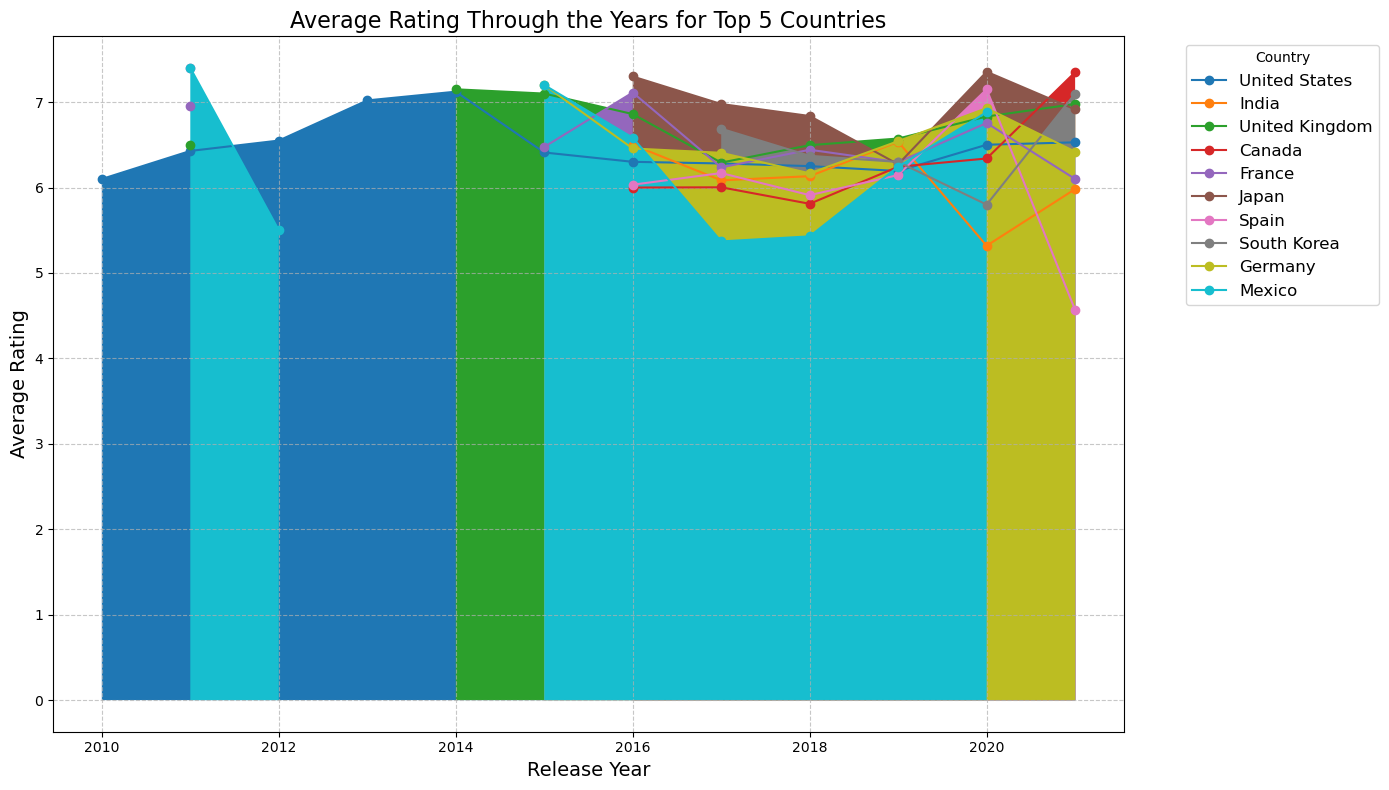

In [156]:
# Calculate the average rating by country
country_avg_rating = df_expanded.groupby('country')['Rating'].mean()

# Get the top 20 countries by average rating
top_20_countries = countries_count.sort_values(by="Count", ascending=False)["Country"][0:10]

# Filter the DataFrame to include only these top 20 countries
df_filtered = df_expanded[df_expanded['country'].isin(top_20_countries)]

# Pivot the data to get average ratings per year for each country
pivot_df = df_filtered.pivot_table(index='year_added', columns='country', values='Rating', aggfunc='mean').reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each country's line and fill
for country in top_20_countries:
    if country in pivot_df.columns:
        ax.plot(pivot_df['year_added'], pivot_df[country], marker='o', label=country)
        ax.fill_between(pivot_df['year_added'], pivot_df[country], alpha=1)

# Customizations
ax.set_title('Average Rating Through the Years for Top 5 Countries', fontsize=16)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [151]:
countries_count.sort_values(by="Count", ascending=False)["Country"][0:20]

0      United States
1              India
2     United Kingdom
3             Canada
4             France
5              Japan
6              Spain
7        South Korea
8            Germany
9             Mexico
10             China
11         Australia
12             Egypt
13            Turkey
14         Hong Kong
15           Nigeria
16             Italy
17            Brazil
18         Argentina
19           Belgium
Name: Country, dtype: object

/var/folders/34/g4lmjsg53yn3m175jbcsg1gm0000gn/T/ipykernel_3031/4075527923.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = genre_country_counts.pivot('clean_cat', 'country_list', 'count').fillna(0)


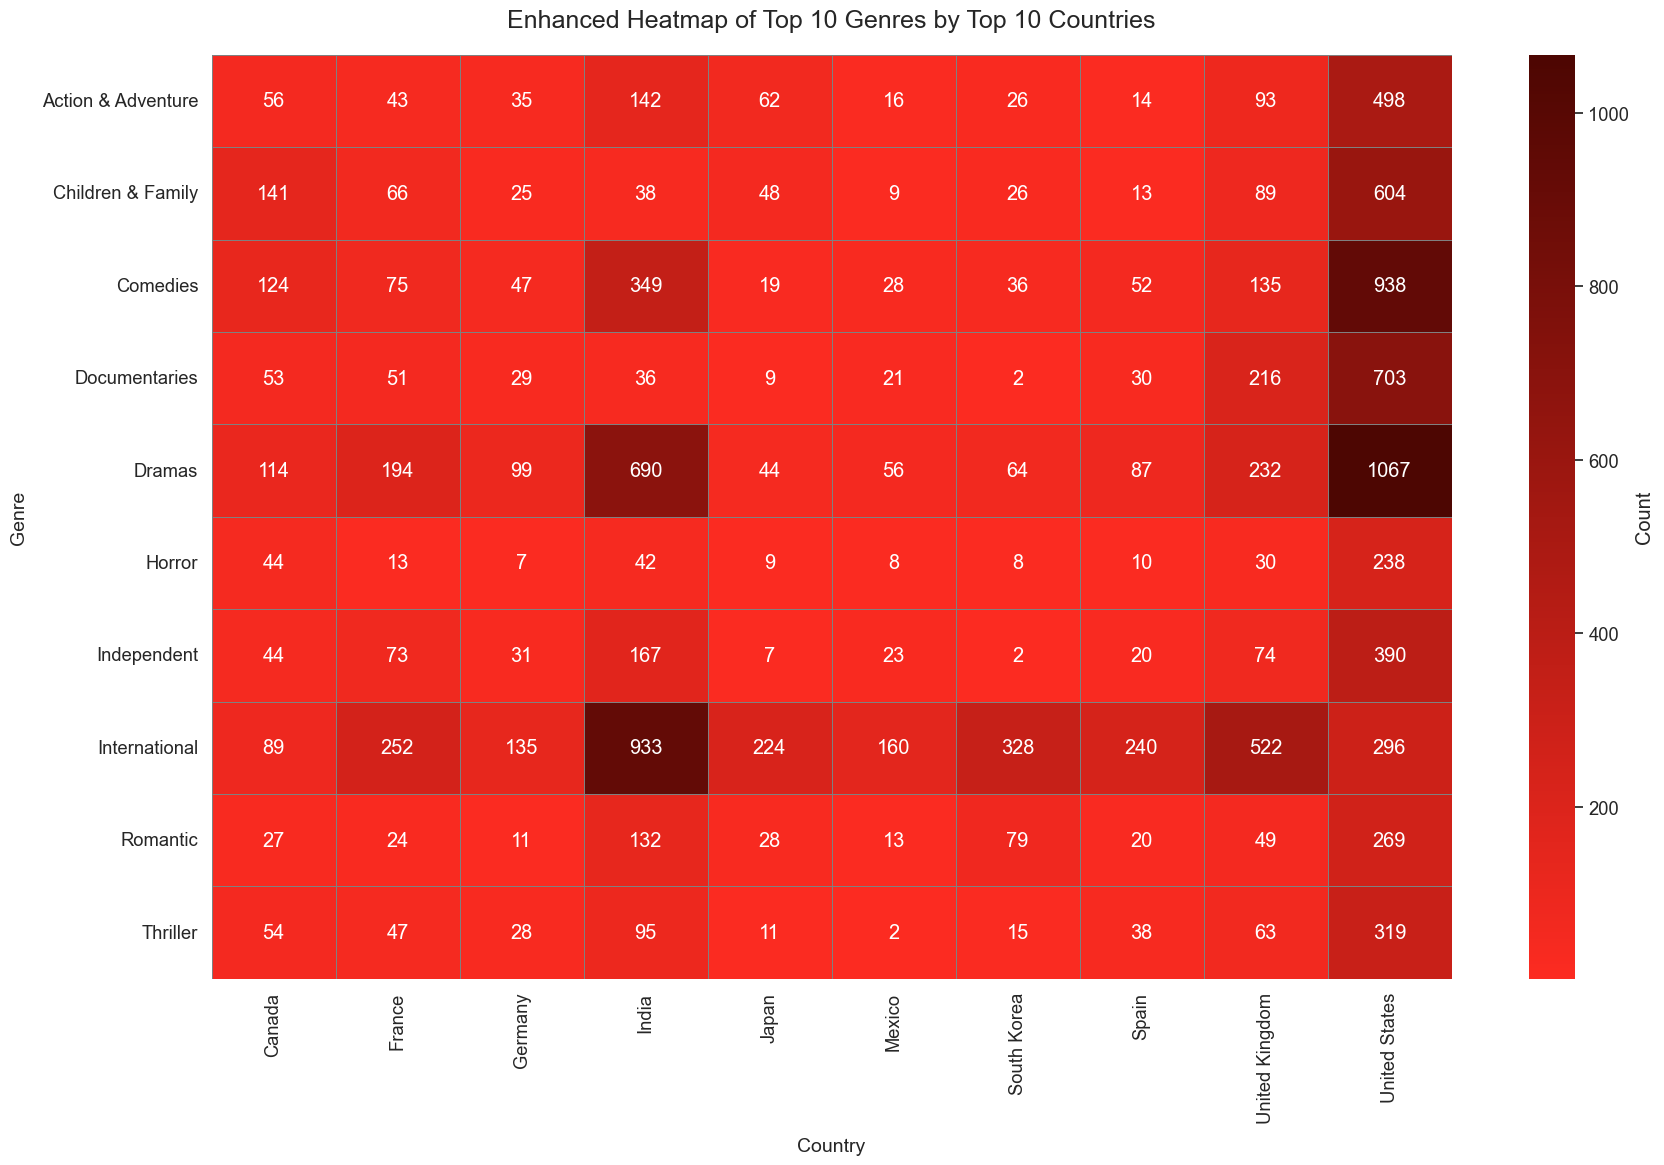

In [134]:
# # Load the dataset
# file_path = 'netflix_titles.csv'  # Update this path to your local path
# netflix = pd.read_csv(file_path)

# Fill missing values
import seaborn as sns
import matplotlib.colors as mcolors

netflix = netflix[~netflix["country"].isnull()]

# Split countries and genres correctly
netflix = netflix.explode('country_list')
netflix = netflix.explode('clean_cat')

# Count occurrences of each genre and country
genre_counts = netflix['clean_cat'].value_counts().head(10)
country_counts = netflix['country_list'].value_counts().head(10)

# Filter the dataframe to include only top 10 genres and countries
filtered_df = netflix[netflix['clean_cat'].isin(genre_counts.index) & netflix['country_list'].isin(country_counts.index)]

# Count occurrences of each genre for each country
genre_country_counts = filtered_df.groupby(['country_list', 'clean_cat']).size().reset_index(name='count')

# Pivot the dataframe to create a matrix suitable for heatmap
heatmap_data = genre_country_counts.pivot('clean_cat', 'country_list', 'count').fillna(0)

cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#fc2b21', '#4d0602'])

# Set up the figure size and aesthetics
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)

# Create the heatmap with annotations
ax = sns.heatmap(
    heatmap_data, 
    cmap=cmap, 
    linewidths=0.5, 
    linecolor='gray', 
    annot=True, 
    fmt='.0f', 
    cbar_kws={'label': 'Count'}
)

# Set titles and labels
plt.title('Enhanced Heatmap of Top 10 Genres by Top 10 Countries', fontsize=18, pad=20)
plt.xlabel('Country', fontsize=14, labelpad=10)
plt.ylabel('Genre', fontsize=14, labelpad=10)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

/var/folders/34/g4lmjsg53yn3m175jbcsg1gm0000gn/T/ipykernel_3031/1228291118.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  line_plot_data = country_year_counts.pivot('year_added', 'country', 'count').fillna(0)


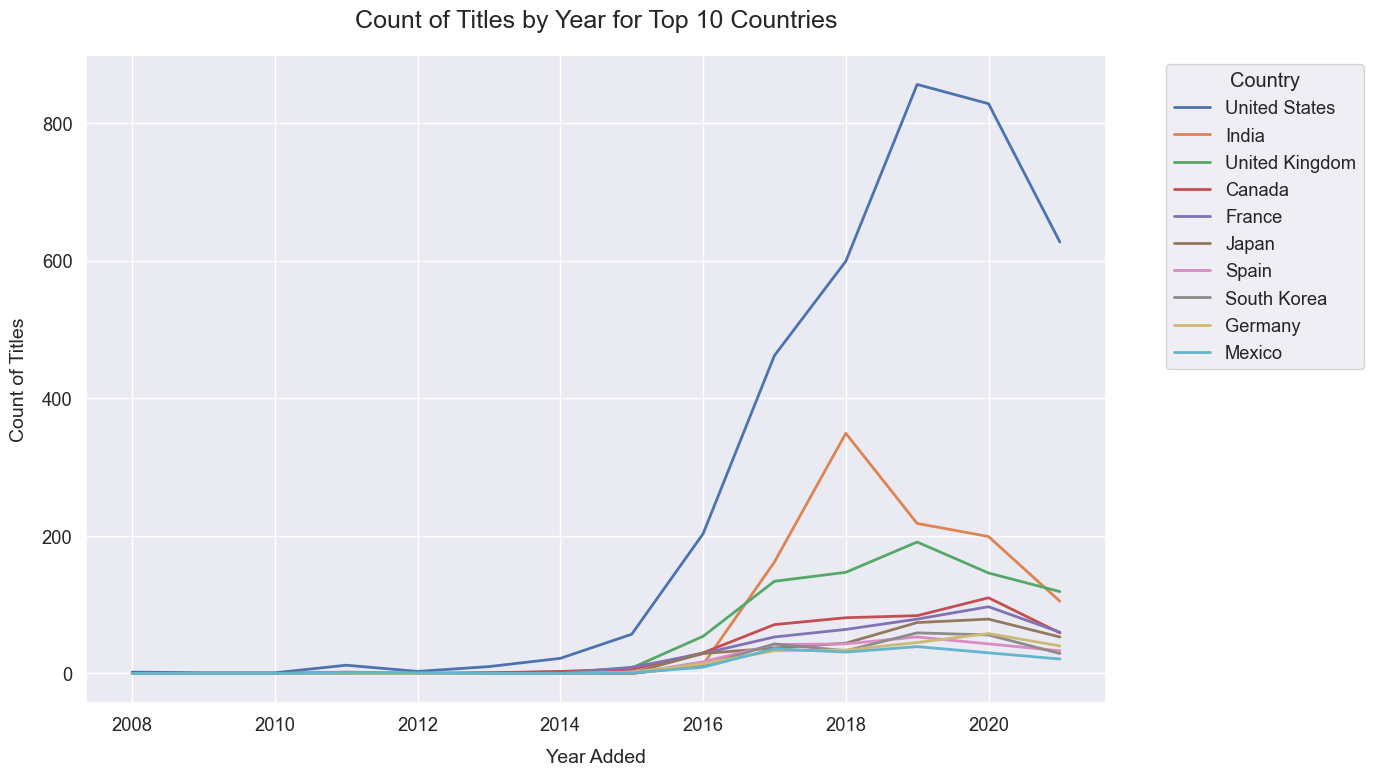

In [143]:
file_path = 'netflix_titles.csv'  # Update this path to your local path
df = pd.read_csv(file_path)


df = df[~df["country"].isnull()]
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Split countries correctly
df = df.assign(country=df['country'].str.split(', ')).explode('country')

# Identify the top 10 countries excluding the United States
#top_countries = df[df['country'] != "United States"]['country'].value_counts().head(10).index
top_countries = df['country'].value_counts().head(10).index

# Filter the dataframe to include only top 10 countries
filtered_df = df[df['country'].isin(top_countries)]

# Aggregate the count of titles per country for each year
country_year_counts = filtered_df.groupby(['year_added', 'country']).size().reset_index(name='count')

# Pivot the dataframe to create a matrix suitable for line plot
line_plot_data = country_year_counts.pivot('year_added', 'country', 'count').fillna(0)

# Set up the figure size and aesthetics
fig, ax = plt.subplots(figsize=(14, 8))
#ax.style.use('darkgrid')

# Create the line plot
for country in top_countries:
    ax.plot(line_plot_data.index, line_plot_data[country], marker='', linewidth=2, label=country)

# Set titles and labels
ax.set_title('Count of Titles by Year for Top 10 Countries', fontsize=18, pad=20)
ax.set_xlabel('Year Added', fontsize=14, labelpad=10)
ax.set_ylabel('Count of Titles', fontsize=14, labelpad=10)

# Add a legend
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [192]:
import plotly.graph_objects as go

# Load the dataset
file_path = 'netflix_titles.csv'  # Update this path to your local path
df = pd.read_csv(file_path)

# Fill missing values
df = df[~df["country"].isnull()]
df['listed_in'] = df['listed_in'].fillna('Unknown')

# Split countries and genres correctly
df = df.assign(country=netflix['country_list']).explode('country')
df = df.assign(genres=netflix["clean_cat"]).explode('genres')

# Identify the top 10 countries and genres
top_countries = df['country'].value_counts().head(10).index
top_genres = df['genres'].value_counts().head(10).index

# Filter the dataframe to include only top 10 countries and genres
filtered_df = df[df['country'].isin(top_countries) & df['genres'].isin(top_genres)]

# Prepare data for the Sankey diagram
type_counts = filtered_df['type'].value_counts()
country_counts = filtered_df['country'].value_counts()
genre_counts = filtered_df['genres'].value_counts()

# Create a mapping of nodes to their index
all_nodes = list(type_counts.index) + list(country_counts.index) + list(genre_counts.index)
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Create the links for the Sankey diagram
links = []

# Links from type to country
for t in type_counts.index:
    temp_df = filtered_df[filtered_df['type'] == t]
    for c in temp_df['country'].value_counts().index:
        links.append({
            'source': node_indices[t],
            'target': node_indices[c],
            'value': temp_df['country'].value_counts()[c]
        })

# Links from country to genre
for c in country_counts.index:
    temp_df = filtered_df[filtered_df['country'] == c]
    for g in temp_df['genres'].value_counts().index:
        links.append({
            'source': node_indices[c],
            'target': node_indices[g],
            'value': temp_df['genres'].value_counts()[g]
        })

# Extract source, target, and value lists for the Sankey diagram
source = [link['source'] for link in links]
target = [link['target'] for link in links]
value = [link['value'] for link in links]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

# Set the title and layout of the plot
fig.update_layout(title_text="Sankey Diagram of Netflix Titles by Type, Country, and Genre", font_size=12)

# Show the plot
fig.show()


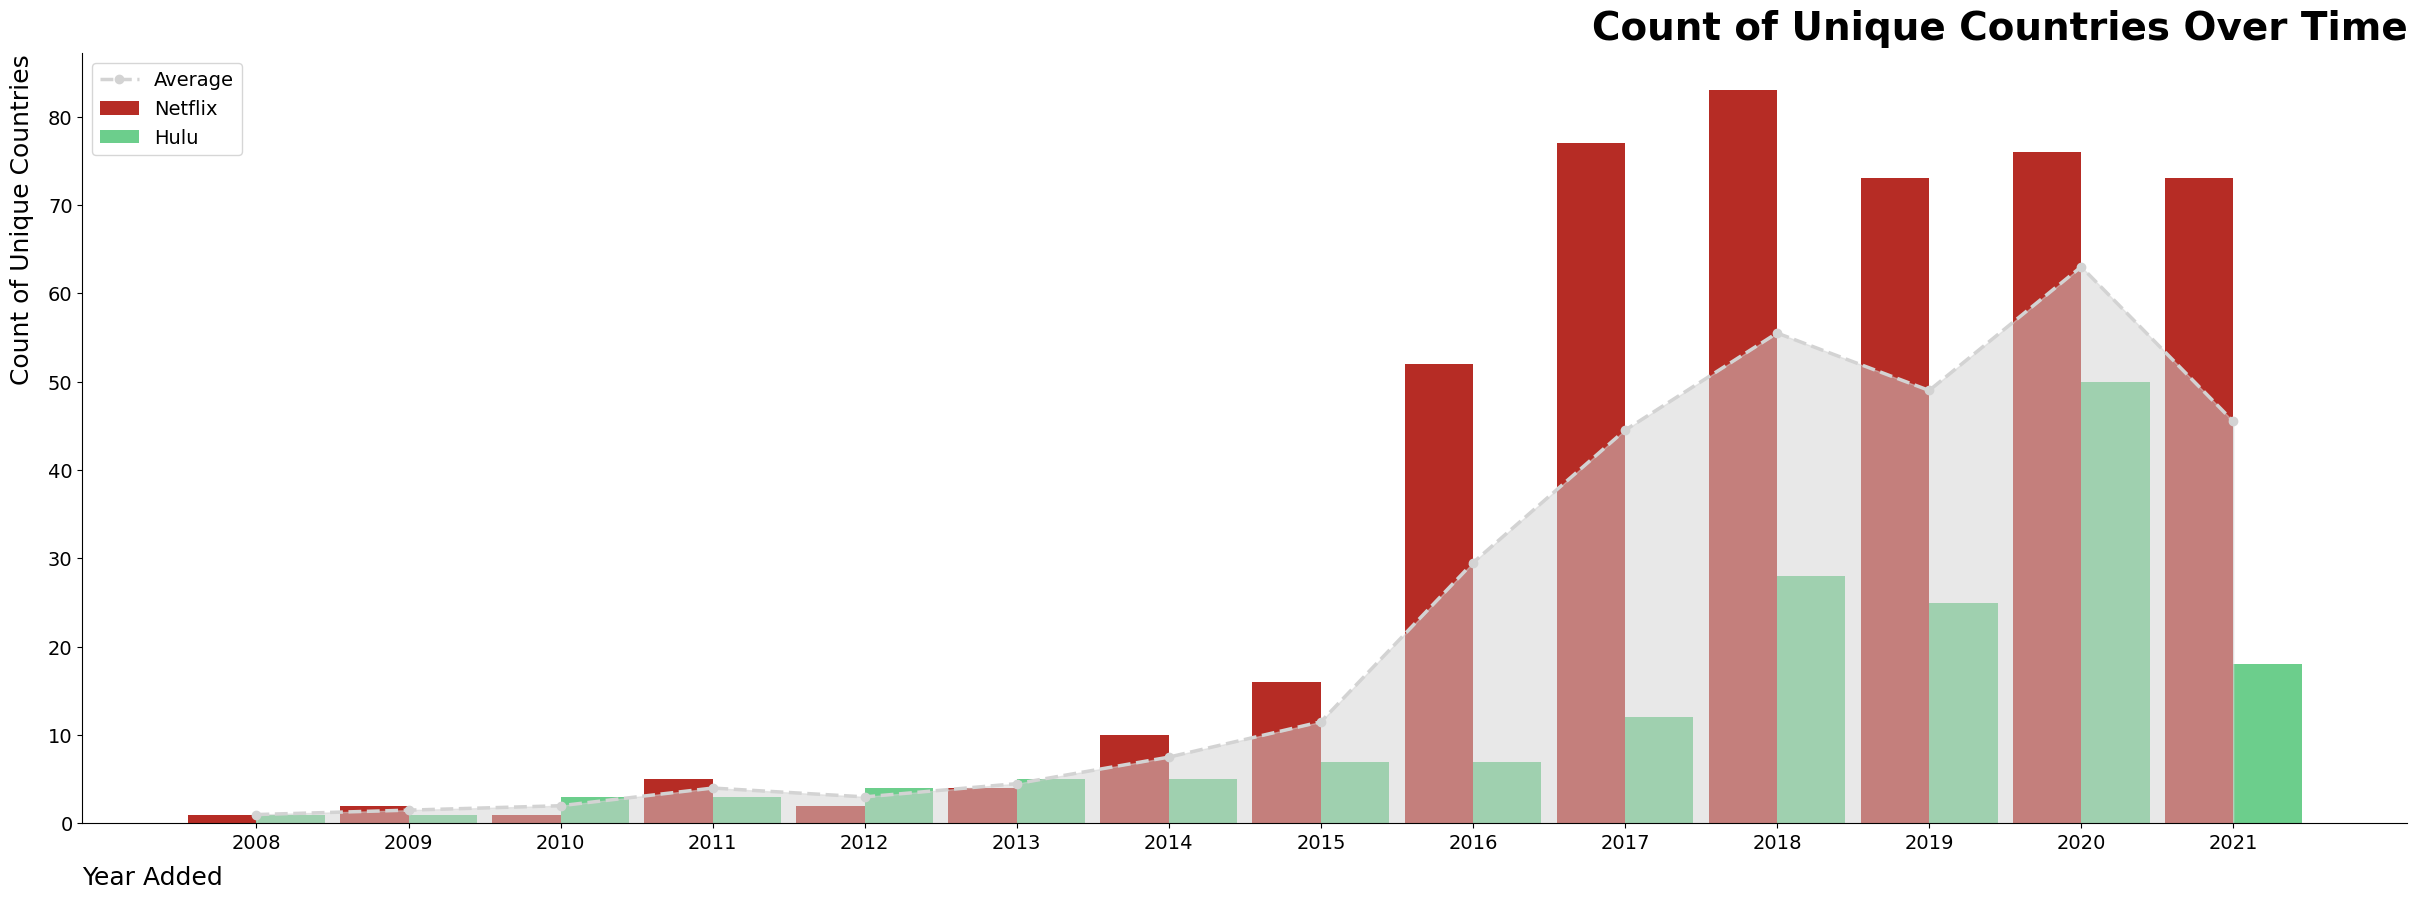

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
netflix = pd.read_csv('netflix_titles.csv')  # Update this path to your local path
hulu = pd.read_csv('hulu_titles.csv')  # Update this path to your local path

# Preprocess Netflix data
netflix = netflix[~netflix["country"].isnull()]
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['year_added'] = netflix['date_added'].dt.year

# Preprocess Hulu data
hulu = hulu[~hulu["country"].isnull()]
hulu['date_added'] = pd.to_datetime(hulu['date_added'], errors='coerce')
hulu['year_added'] = hulu['date_added'].dt.year
hulu = hulu[hulu['year_added'] >= 2008]

# Split countries correctly
netflix = netflix.assign(country=netflix['country'].str.split(', ')).explode('country')
hulu = hulu.assign(country=hulu['country'].str.split(', ')).explode('country')

# Count unique countries per year
unique_countries_per_year_netflix = netflix.groupby('year_added')['country'].nunique().reset_index()
unique_countries_per_year_hulu = hulu.groupby('year_added')['country'].nunique().reset_index()

# Get the common years for the x-axis
common_years = sorted(set(unique_countries_per_year_netflix['year_added']).union(set(unique_countries_per_year_hulu['year_added'])))

# Create a DataFrame to align both Netflix and Hulu counts by these common years
aligned_data = pd.DataFrame({'year': common_years})
aligned_data = aligned_data.merge(unique_countries_per_year_netflix, left_on='year', right_on='year_added', how='left').drop(columns=['year_added'])
aligned_data = aligned_data.merge(unique_countries_per_year_hulu, left_on='year', right_on='year_added', how='left').drop(columns=['year_added'])
aligned_data.columns = ['year', 'netflix', 'hulu']
aligned_data.fillna(0, inplace=True)

averages = (aligned_data['netflix'] + aligned_data['hulu'])/2

# Set up the figure size and aesthetics
fig, ax = plt.subplots(figsize=(30, 10))

# Define bar width
bar_width = 0.45

# Create the bar graph
X_axis = np.arange(len(aligned_data['year']))

ax.bar(X_axis - bar_width/2, aligned_data['netflix'], color='#B62C25', width=bar_width, label='Netflix')
ax.bar(X_axis + bar_width/2, aligned_data['hulu'], color='#6CCE8C', width=bar_width, label='Hulu')
ax.plot(X_axis, averages, color = 'lightgrey', linestyle = "--", marker='o', label = "Average", linewidth=2.5)
ax.fill_between(X_axis, averages, color='lightgrey', alpha=0.5)


# Set titles and labels
ax.set_title('Count of Unique Countries Over Time', fontsize=28, pad=10, fontweight = "bold", loc="right")
ax.set_xlabel('Year Added', fontsize=18, labelpad=10, loc="left")
ax.set_ylabel('Count of Unique Countries', fontsize=18, labelpad=10, loc="top")
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(X_axis)
ax.set_xticklabels(aligned_data['year'].astype(int), fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.legend(loc='upper left', fontsize=14)
plt.show()


In [126]:
netflix['categories'] = netflix['listed_in'].str.split(',').apply(lambda l: tuple(sorted(s.strip() for s in l)))
mapping = {
    'Action & Adventure': 'Action & Adventure', 'Anime Features': 'Anime', 'Anime Series': 'Anime', 'British TV Shows': 'International',
    'Children & Family Movies': 'Children & Family', 'Classic & Cult TV': 'Classic & Cult', 'Classic Movies': 'Classic & Cult', 
    'Comedies': 'Comedies', 'Crime TV Shows': 'Crime', 'Cult Movies': 'Classic & Cult', 'Documentaries': 'Documentaries', 
    'Docuseries': 'Documentaries', 'Dramas': 'Dramas', 'Faith & Spirituality': 'Faith & Spirituality', 'Horror Movies': 'Horror', 
    'Independent Movies': 'Independent', 'International Movies': 'International', 'International TV Shows': 'International', 
    'Korean TV Shows': 'International', 'Kids\' TV': 'Children & Family', 'LGBTQ Movies': 'LGBTQ', 'Movies': 'Movies', 
    'Music & Musicals': 'Music & Musicals', 'Science & Nature TV': 'Science & Nature', 'Reality TV': 'Reality TV', 
    'Romantic Movies': 'Romantic', 'Romantic TV Shows': 'Romantic', 'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy', 
    'Spanish-Language TV Shows': 'International', 'Sports Movies': 'Sports Movies', 'Stand-Up Comedy': 'Comedy', 
    'Stand-Up Comedy & Talk Shows': 'Comedy', 'Teen TV Shows': 'Teen', 'Thrillers': 'Thriller', 'TV Action & Adventure': 'Action & Adventure', 
    'TV Comedies': 'Comedies', 'TV Dramas': 'Dramas', 'TV Horror': 'Horror', 'TV Mysteries': 'Mysteries', 'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy', 
    'TV Shows': 'TV Shows', 'TV Thrillers': 'Thriller'
}
netflix['clean_cat'] = netflix['categories'].apply(
    lambda x: [mapping.get(genre, genre) for genre in x if genre not in ['TV Shows', 'Movies']])
netflix.head().T

,0,1,4,7,7
show_id,s1,s2,s5,s8,s8
type,Movie,TV Show,TV Show,Movie,Movie
title,Dick Johnson Is Dead,Blood & Water,Kota Factory,Sankofa,Sankofa
director,Kirsten Johnson,NaN,NaN,Haile Gerima,Haile Gerima
cast,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
country,United States,South Africa,India,"United States, Ghana, Burkina Faso, United Kin...","United States, Ghana, Burkina Faso, United Kin..."
date_added,2021-09-25 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00
release_year,2020,2021,2021,1993,1993
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA
duration,90 min,2 Seasons,2 Seasons,125 min,125 min


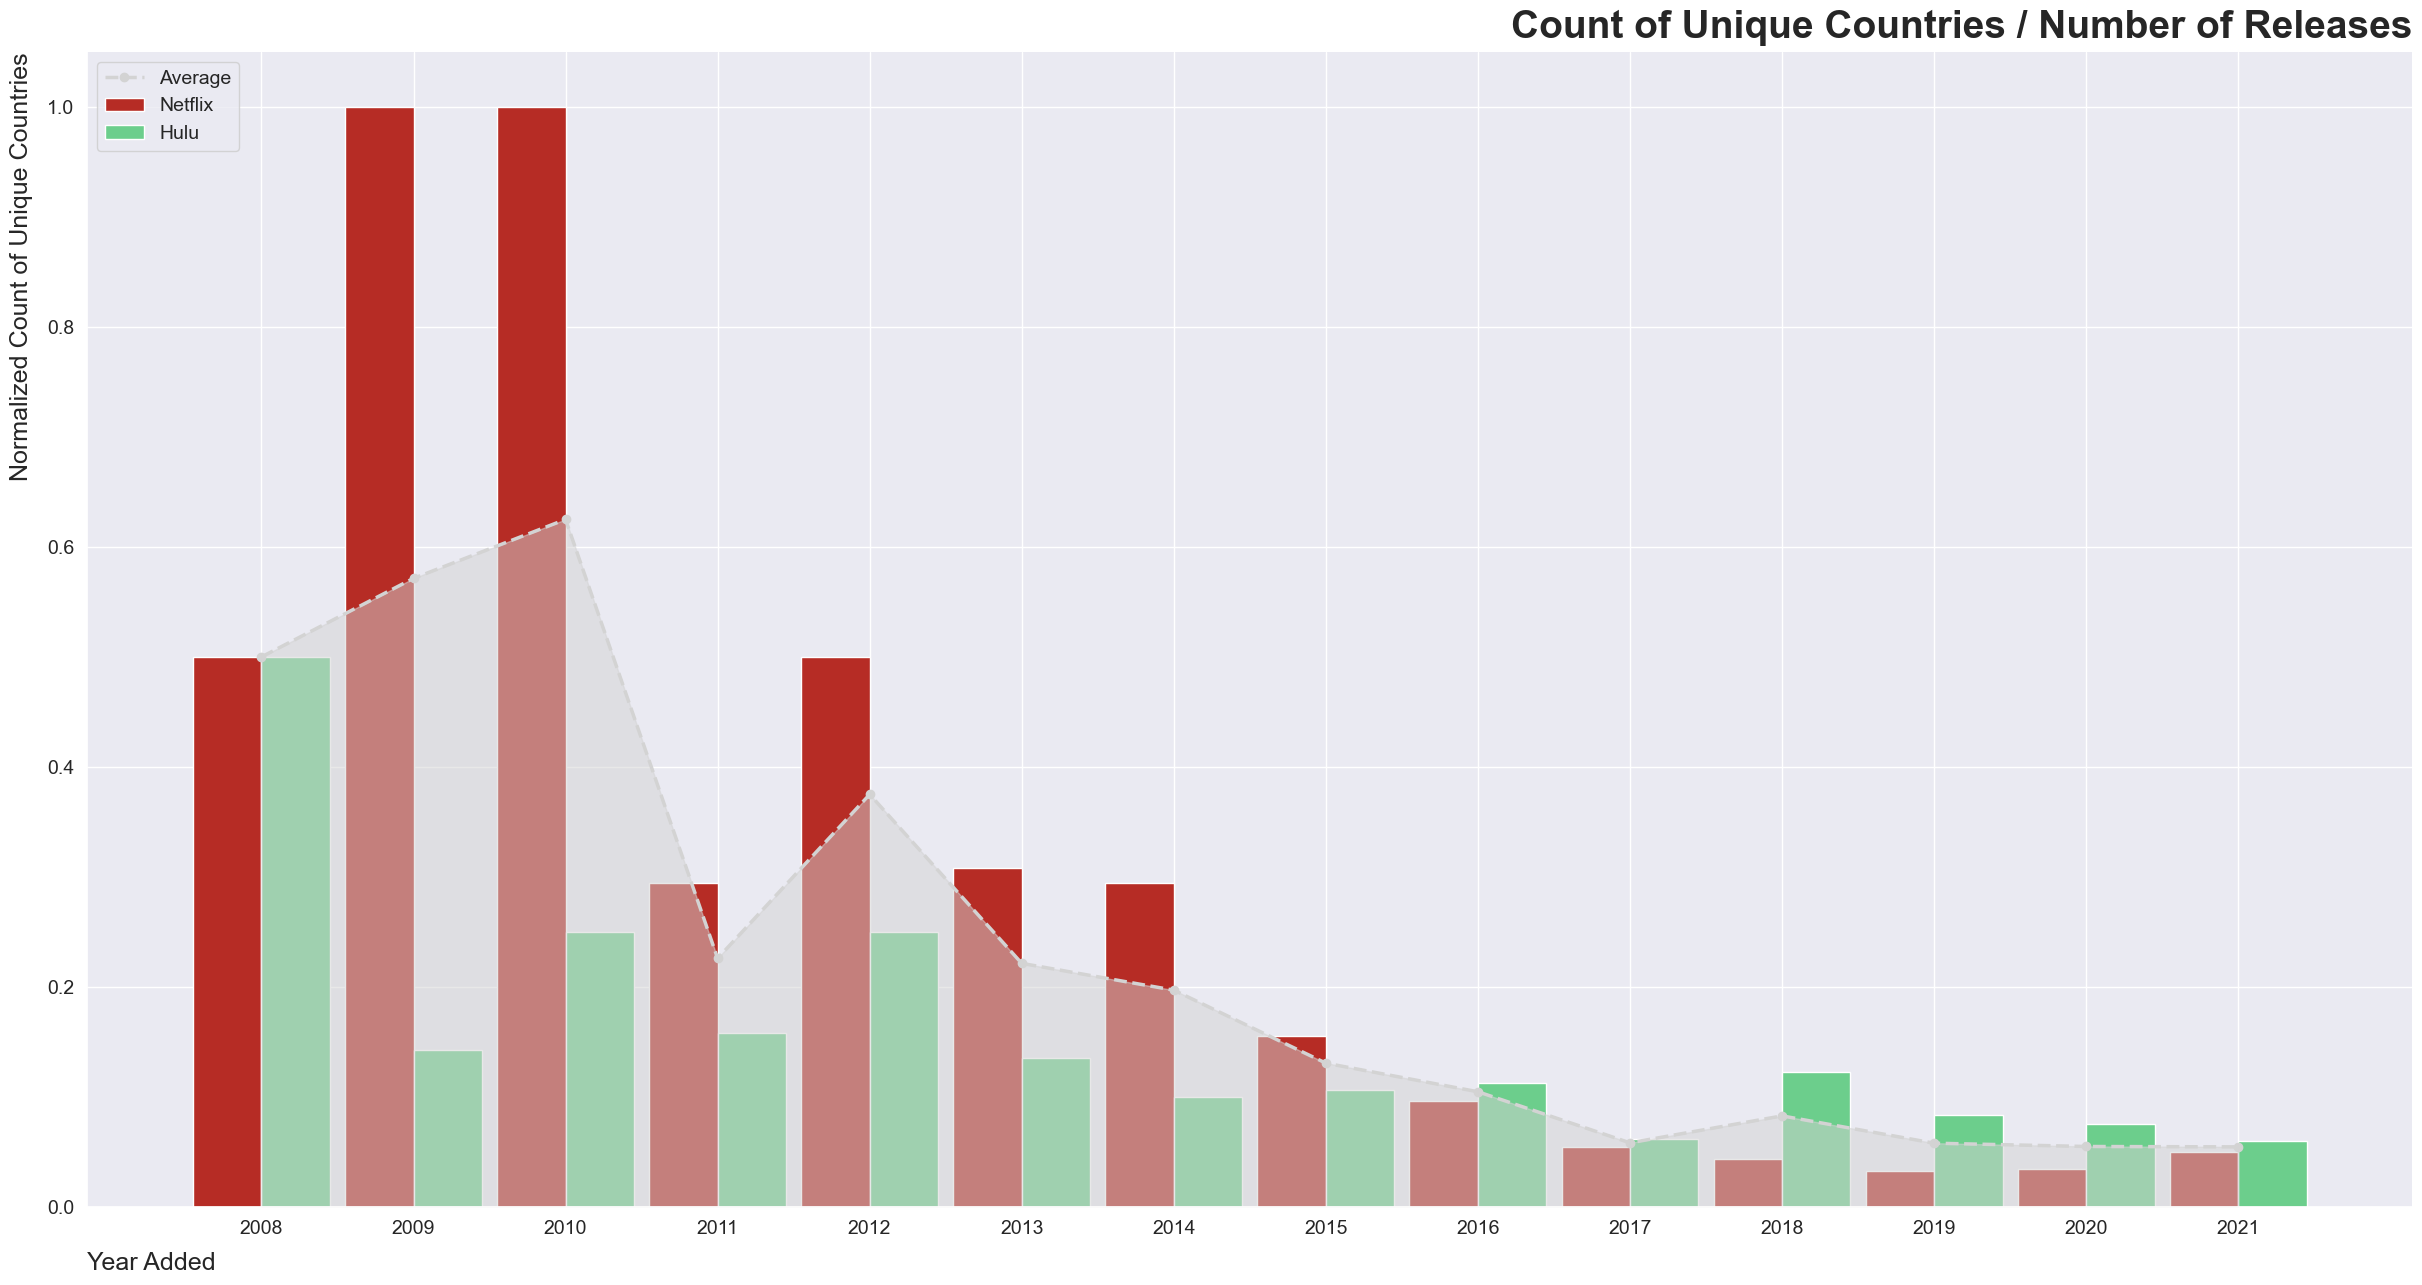